In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

##### Client Attributes
* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

##### Last Telephone Contact
* contact: contact communication type (categorical: "cellular","telephone")
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Other Attributes
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

##### Social and Economic Context
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)     
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

In [ ]:
df=pd.read_csv('bank-additional-full.csv',sep=';')


In [ ]:

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.poutcome.unique()
df.shape

(41188, 21)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
poutcomes = df[df.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
poutcomes

24013    0
24019    0
24076    0
24102    0
24108    1
        ..
41174    1
41175    0
41178    1
41182    1
41187    0
Name: poutcome, Length: 5625, dtype: int64

In [ ]:
coutcomes = df.y.apply(lambda x: 1 if x == 'yes' else 0)
coutcomes

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
x,y=df.drop('y',axis=1),df.y
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,stratify=y,shuffle=True,test_size=.2)

In [ ]:
print('Number of training records:', len(x_train))
print('Training proportions:\n\n', y_train.value_counts() / len(y_train))

Number of training records: 32950
Training proportions:

 no     0.887344
yes    0.112656
Name: y, dtype: float64


In [ ]:
print('Number of training records:', len(x_test))
print('Training proportions:\n\n', y_test.value_counts() / len(y_test))

Number of training records: 8238
Training proportions:

 no     0.887351
yes    0.112649
Name: y, dtype: float64


In [ ]:
df_bank_test=pd.concat([x_test,y_test],axis=1)
print('Test dataset shape:',df_bank_test.shape)
df_bank_test.to_csv('bank_test.csv',sep=',',index=False)

Test dataset shape: (8238, 21)


In [ ]:
df_bank_train=pd.concat([x_train,y_train],axis=1)
print('Train dataset shape:',df_bank_train.shape)
df_bank_train.to_csv('bank_train.csv',sep=',',index=False)

Train dataset shape: (32950, 21)


In [ ]:
df_bank_test.dtypes.groupby(df_bank_test.dtypes).size()
df_bank_test.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
dtypes = pd.DataFrame(df_bank_train.dtypes.rename('type')).reset_index().astype('str')
dtypes

,index,type
0,age,int64
1,job,object
2,marital,object
3,education,object
4,default,object
5,housing,object
6,loan,object
7,contact,object
8,month,object
9,day_of_week,object


In [ ]:
dtypes=dtypes.query('index !="duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical=dtypes[(dtypes.type.isin(['object']))& (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


# Categorical Data Analysis

In [ ]:
df_bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14304,25,blue-collar,single,high.school,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
10075,40,admin.,married,high.school,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
23305,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
16105,37,blue-collar,married,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
22225,54,housemaid,married,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15926,35,admin.,married,unknown,unknown,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
16281,34,blue-collar,married,unknown,no,no,yes,cellular,jul,tue,...,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
37238,58,admin.,married,university.degree,no,no,no,telephone,aug,fri,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
7105,50,services,divorced,basic.4y,unknown,yes,yes,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [ ]:
df_bank_train[categorical].isna().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

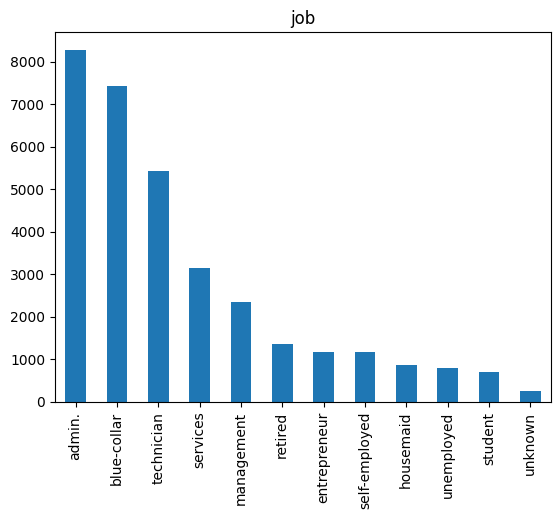

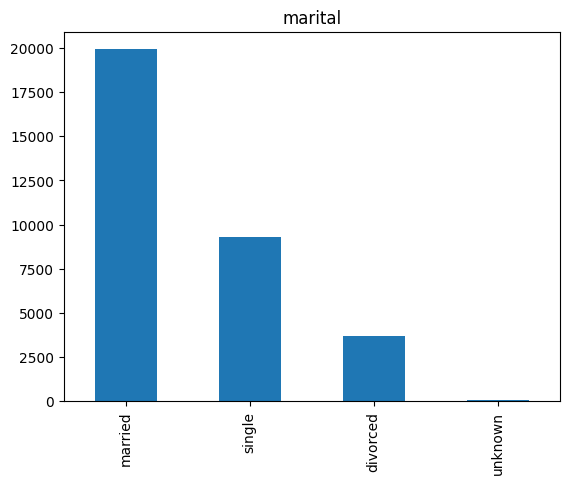

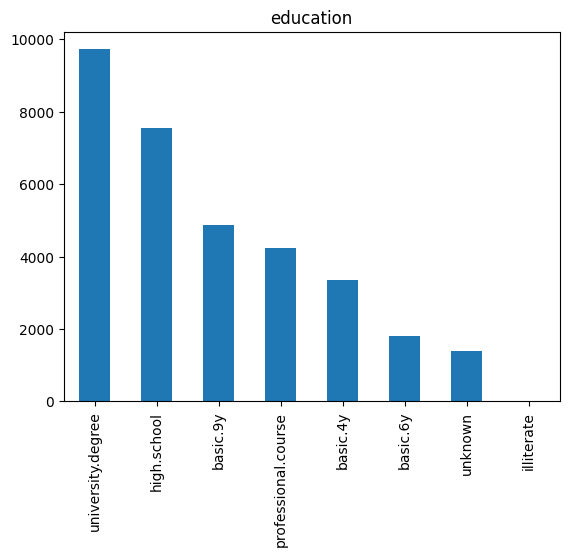

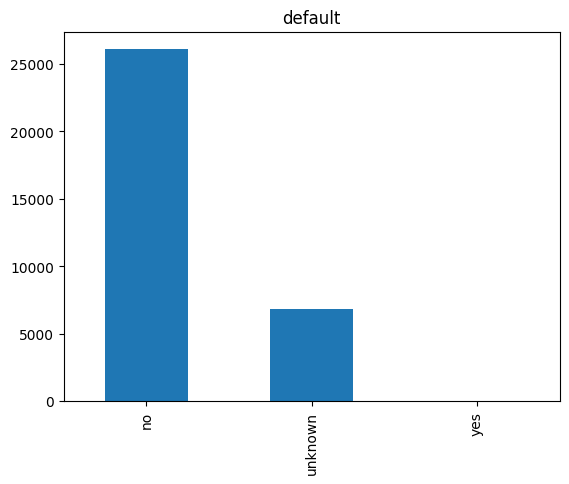

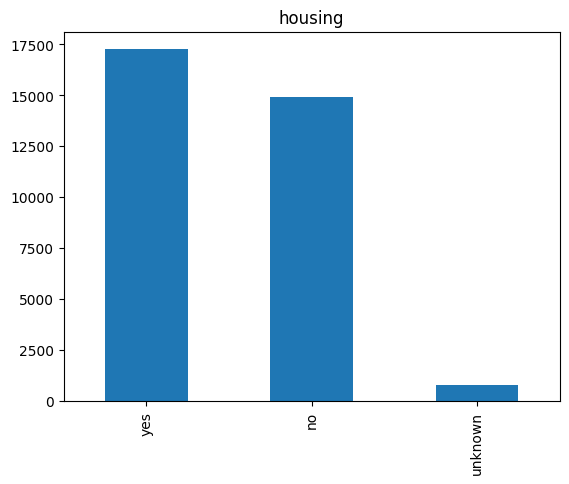

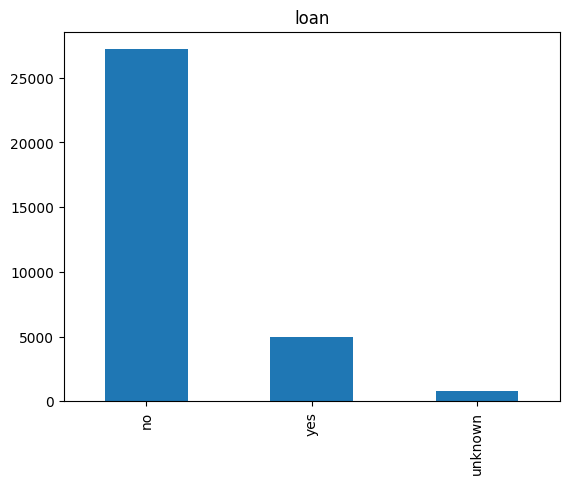

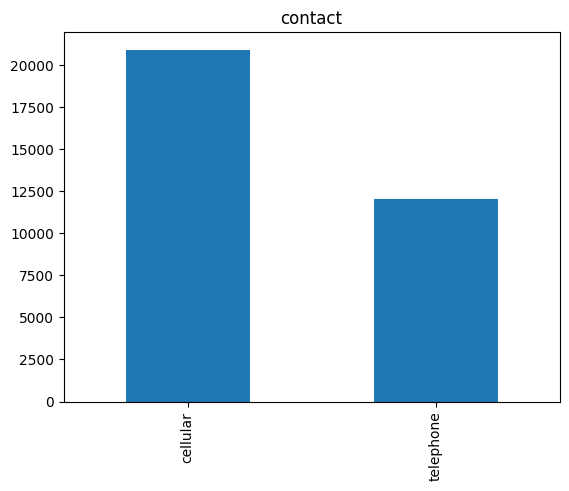

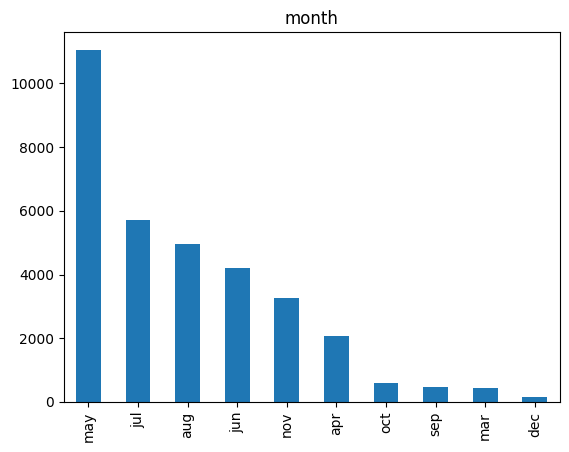

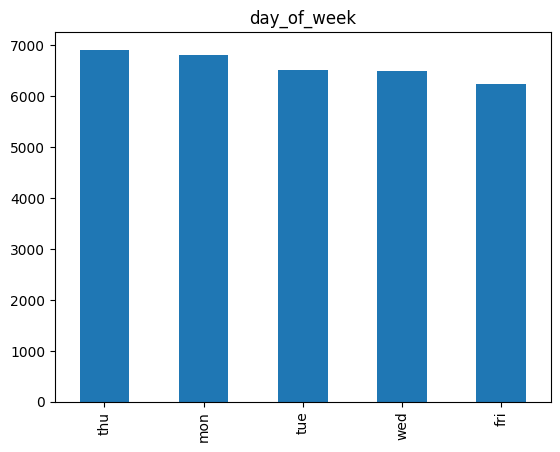

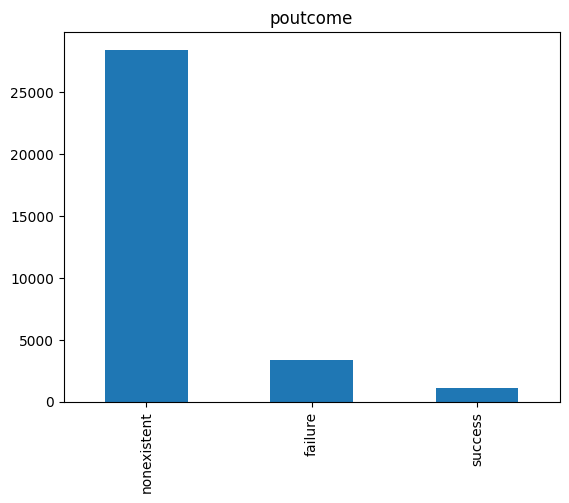

In [ ]:
for attr in categorical:
  plt.figure()
  df_bank_train[attr].value_counts().plot(kind='bar');
  plt.title(attr);

* **bold text** There are fewer "non-traditional" jobs that could be merged if support is too low to be valuable
* The bank has a good understanding of marital status
* No or very few customers are illiterate
* No or very few customers who have defaulted on a loan - not surprising, the bank probably does not want to extend an offer to customers with bad credit
* Similar proportions of customers with and without housing loans
* Few customers have personal loans
* Almost double as many cellular as landline phone calls
* Fewer calls made in the second half of the year
* Calls are uniform accross days of the week
* Some customers were already contacted previously by the bank but many were never contacted at all

Support (job)

admin.           8279
blue-collar      7430
technician       5419
services         3155
management       2351
retired          1362
entrepreneur     1173
self-employed    1162
housemaid         861
unemployed        800
student           697
unknown           261
Name: job, dtype: int64 

Support (marital)

married     19925
single       9287
divorced     3668
unknown        70
Name: marital, dtype: int64 

Support (education)

university.degree      9722
high.school            7546
basic.9y               4860
professional.course    4234
basic.4y               3365
basic.6y               1815
unknown                1393
illiterate               15
Name: education, dtype: int64 

Support (default)

no         26089
unknown     6858
yes            3
Name: default, dtype: int64 

Support (housing)

yes        17259
no         14906
unknown      785
Name: housing, dtype: int64 

Support (loan)

no         27203
yes         4962
unknown      785
Name: loan, dtype: int64 

Sup

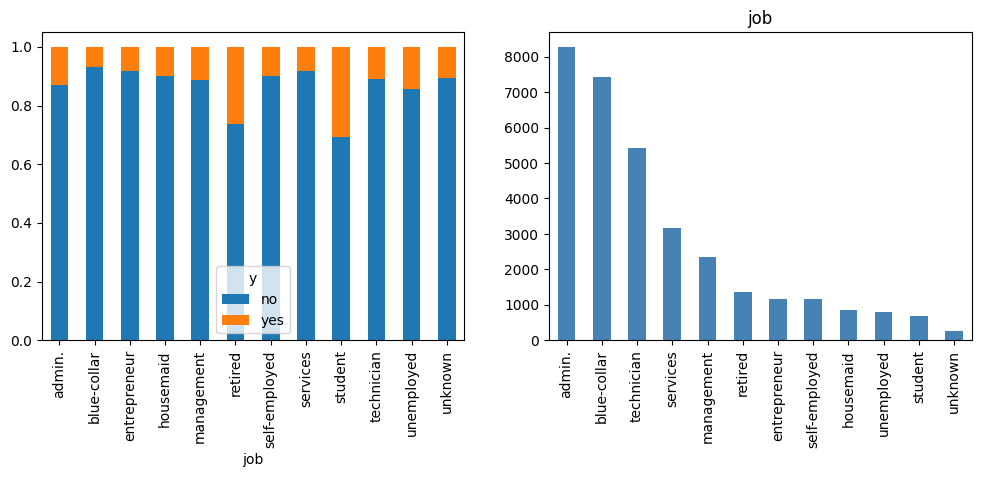

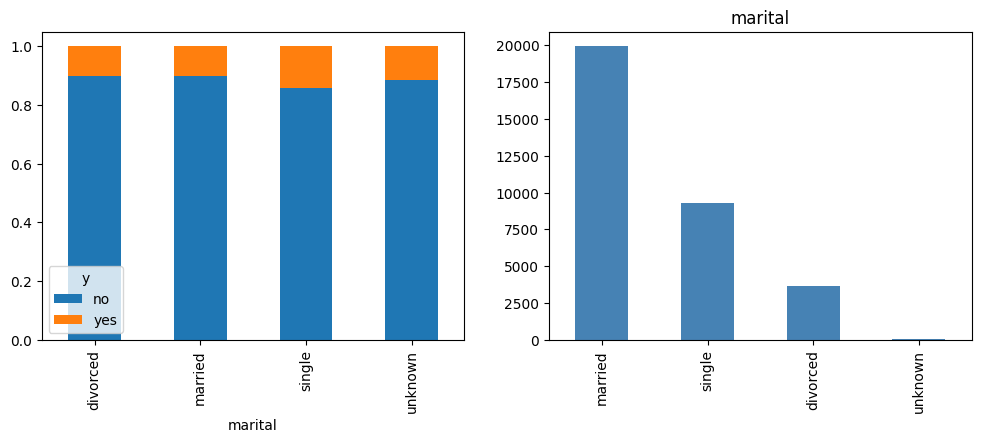

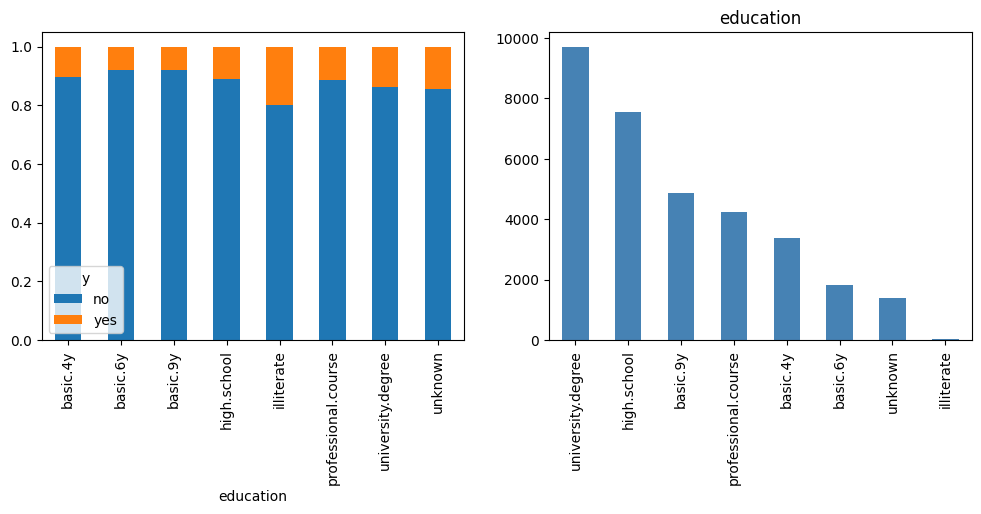

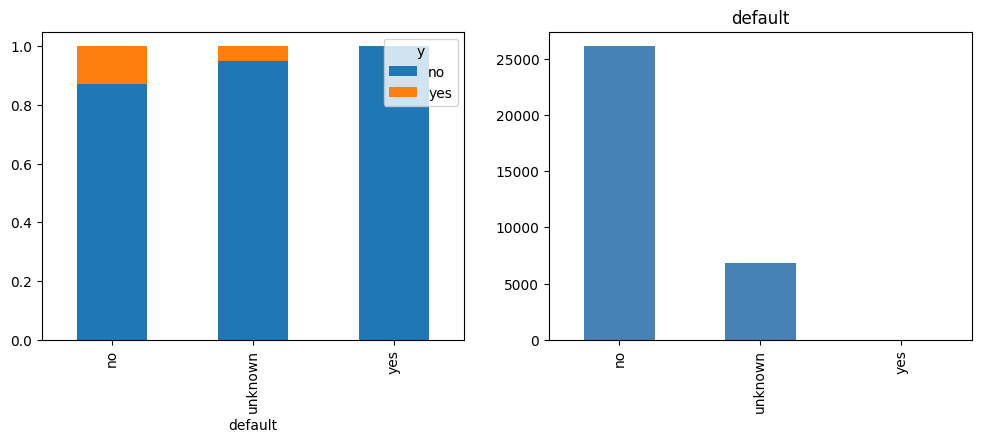

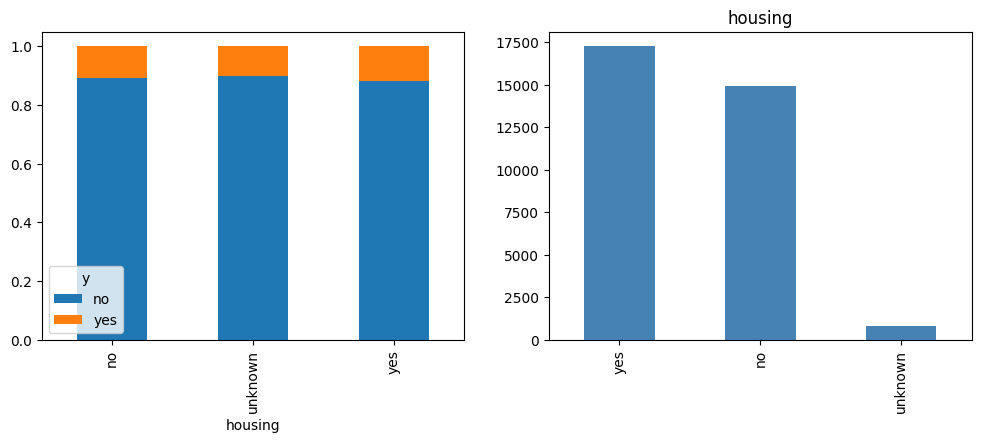

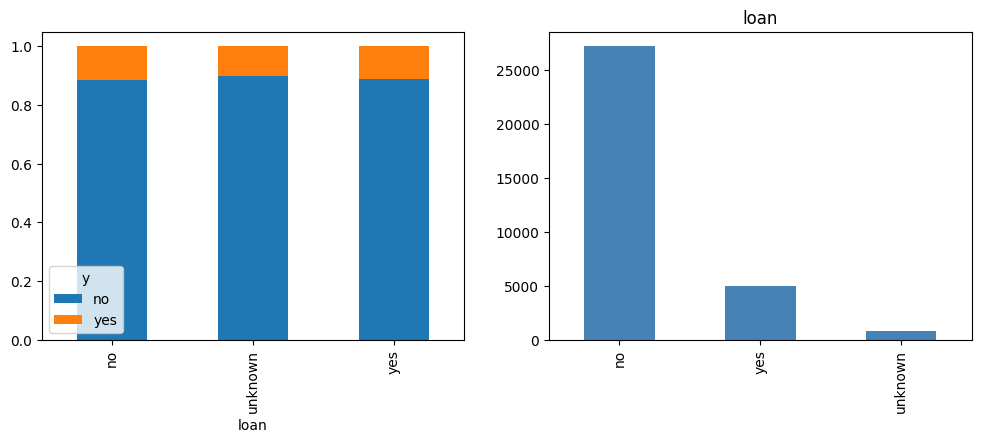

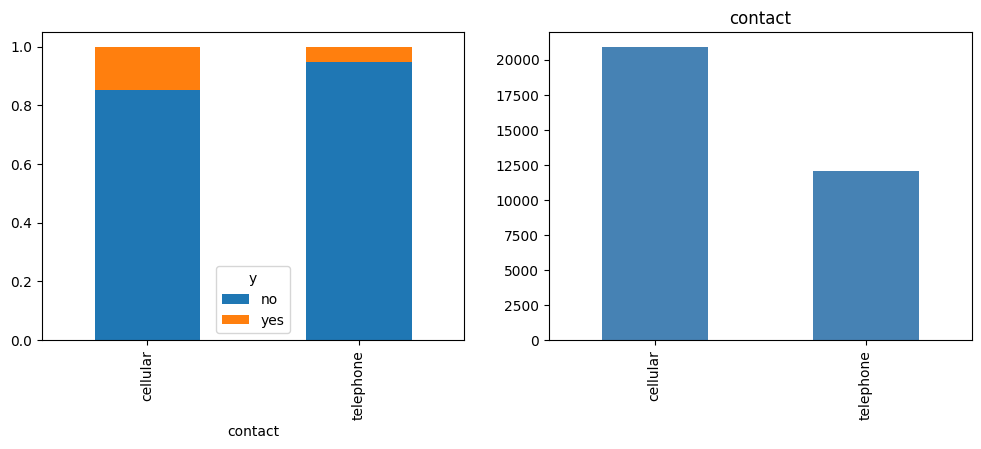

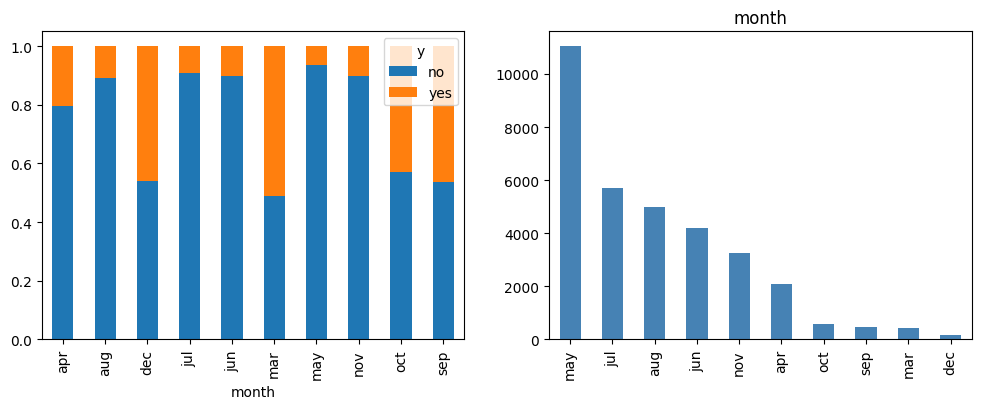

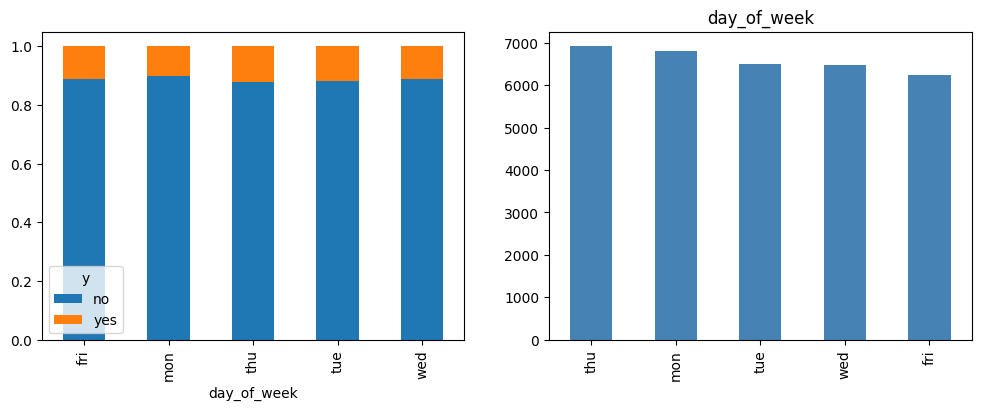

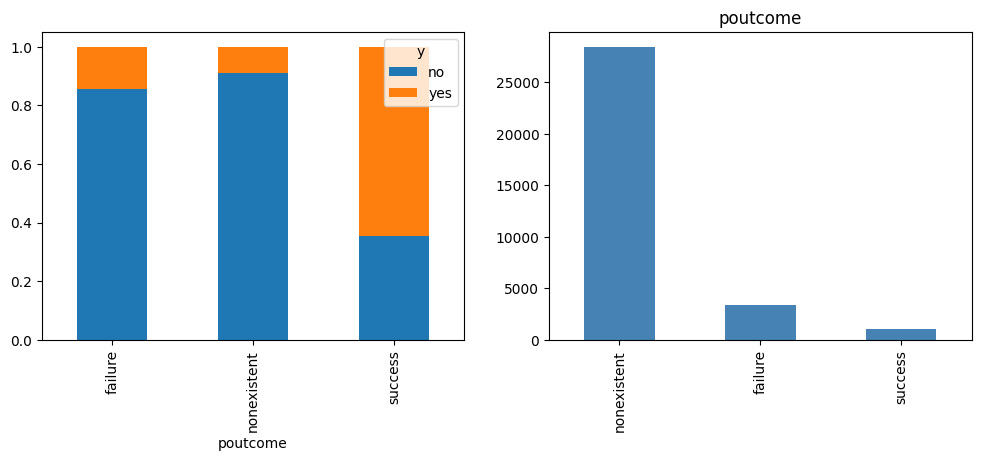

In [ ]:
for attr in categorical:
  fig,(ax1,ax2)=plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = df_bank_train.groupby([attr, 'y']).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='y', values='count', index=attr)
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
  # Plot the counts
  df_bank_train[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
  print('Support (%s)\n' % attr)
  print(df_bank_train[attr].value_counts(), '\n')
  plt.title(attr);

In [ ]:
marrital_resp_rate=(df_bank_train.groupby('marital').y.value_counts()/df_bank_train.groupby('marital').size()).rename('rate').reset_index()
marital_pos_rates = marrital_resp_rate.query('y == "yes"')
marital_pos_rates

,marital,y,rate
1,divorced,yes,0.101145
3,married,yes,0.101782
5,single,yes,0.140519
7,unknown,yes,0.114286


* Customers with admin, retired, student, and unemployed values tend to respond more.  Retired, student, and unemployed have lower support.
* `marital` status isn't very predictive of outcome
* Illiterate customers have a noticably higher response rate but there are few of them
* `default` appears to have predictive power (large proportion of 'no' instances)
* `contact` medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone
* `month` of contact appears to be predictive but low support for months with higher response rates
* `day_of_week` doesn't appear to be very informative
* If customers were contacted at least once before, they are more likely to convert (regardless of whether the last call was a success or failure)

Several attributes (job, marital, education, default, housing, loan) contain a missing value. For all variables except for default, the support of the 'unknown' value is low and the associated response rate is similar to that of other known values, indicating that we probably don't need to apply any missing value techniques to these variables.



Numerical Data Analysis

In [ ]:
df_bank_train[numeric].isna().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

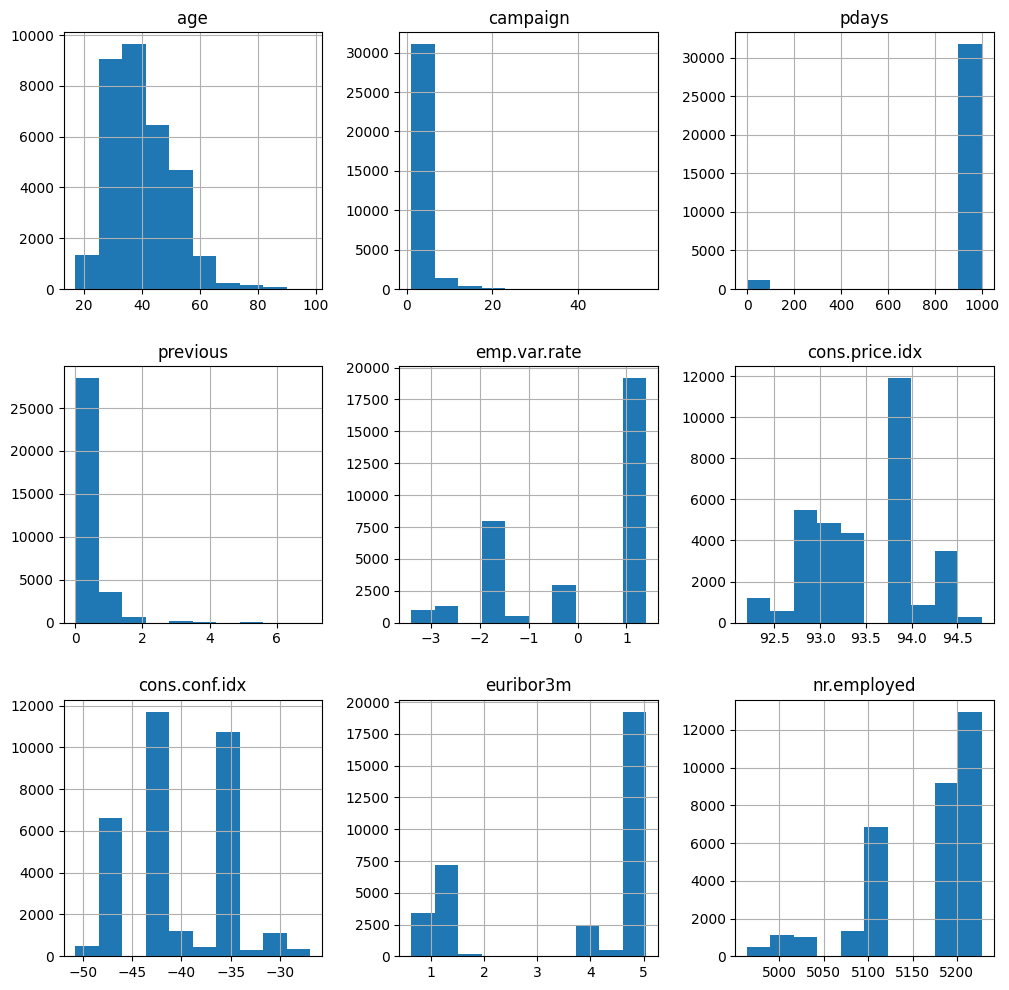

In [ ]:
df_bank_train[numeric].hist(figsize=(12,12));

In [ ]:
df_bank_train[numeric].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.048983,2.567648,962.414021,0.173080,0.079347,93.573330,-40.497939,3.618948,5166.964003
std,10.447702,2.778174,187.064504,0.497709,1.571305,0.579098,4.636680,1.734956,72.220794
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
pdays = df_bank_train.loc[df_bank_train.pdays != 999, ['pdays', 'y']]
pdays

,pdays,y
38182,4,no
39589,1,no
40298,6,yes
36043,3,no
39196,6,yes
...,...,...
40400,9,yes
39272,6,yes
39594,6,no
37321,4,yes


array([[<Axes: title={'center': 'pdays'}>]], dtype=object)

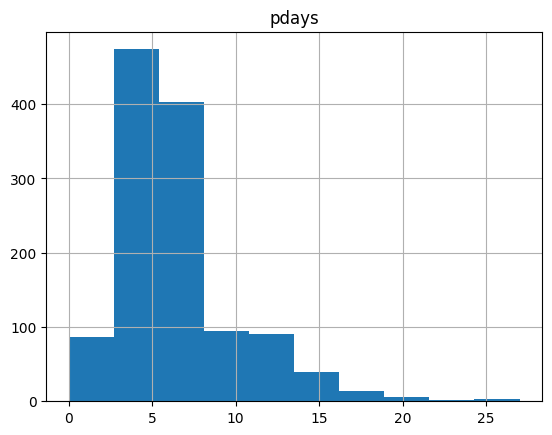

In [ ]:
pdays.hist()

The response rate is significantly higher for customers with an associated pdays value (they were previously contacted). Customers who were previously contacted are seven times more likely to convert than customers without an associated value. It could be that these customers were previously contacted because it was already found that they had higher response rates / the previous campaign might have leveraged a similar predictive model to identify which customers to contact.

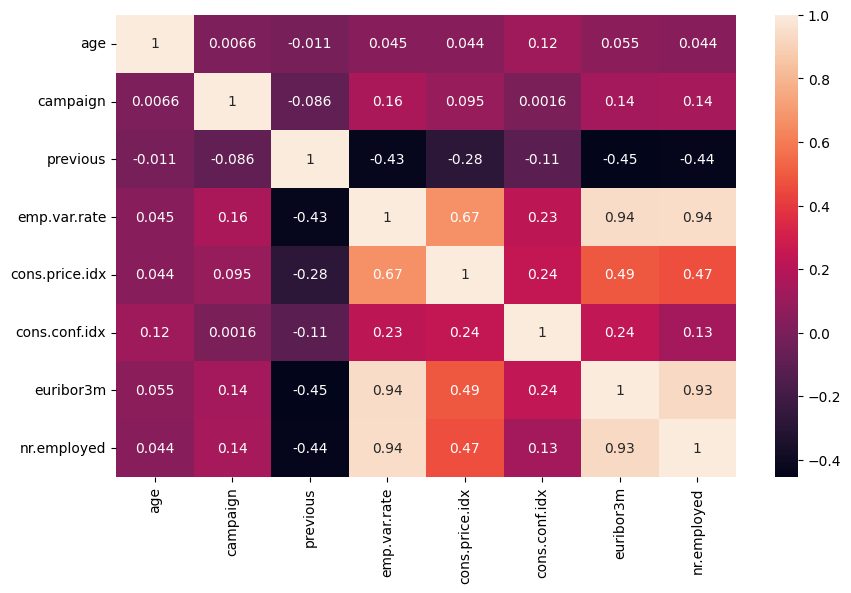

In [ ]:
plt.figure(figsize=(10,6));
sns.heatmap(df_bank_train[numeric].drop('pdays', axis=1).corr('spearman'), annot=True);


Strongest correlations are between the socioeconomic attributes

In [ ]:
signif_corrs = [
  ('previous', 'emp.var.rate'),
  ('previous', 'euribor3m'),
  ('previous', 'nr.employed'),
  ('emp.var.rate', 'cons.price.idx'),
  ('emp.var.rate', 'euribor3m'),
  ('emp.var.rate', 'nr.employed'),
  ('cons.price.idx', 'euribor3m'),
  ('cons.price.idx', 'nr.employed'),
  ('euribor3m', 'nr.employed')
]

for x, y in signif_corrs:
  plt.figure();
  sns.jointplot(df_bank_train[x],df_bank_train[y]);
  plt.title('%s, %s' % (x, y));

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>